Import the file

In [19]:
import json
with open('../data/bgg_RatingItem.jl', 'r') as source_file, open('../data/bgg_RatingItemCleaned.csv', 'w') as destination_file:

    destination_file.write('bgg_id'+';;'+'bgg_user_name'+';;'+'bgg_user_rating'+'\n')
    for line in source_file:
        #print(line)
        lineJson = json.loads(line)  # Load the JSON object to ensure it's valid
   
        # Write the line to the destination file
        if 'bgg_user_rating' in lineJson:
            destination_file.write(str(lineJson['bgg_id'])+';;'+str(lineJson['bgg_user_name'])+';;'+str(lineJson['bgg_user_rating'])+'\n')


Calculate how many reviews were without a rating

In [20]:
with open('../data/bgg_RatingItem.jl', 'r') as source_file, open('../data/bgg_RatingItemCleaned.csv', 'r') as cleaned_file:
    line_count = sum(1 for _ in source_file)
    line_count_cleaned = sum(1 for _ in cleaned_file)
print(f"The file contains {line_count} lines.")
print(f"The file contains {line_count_cleaned} lines.")

The file contains 63311160 lines.
The file contains 26221374 lines.


Draw an histogram of the ratings

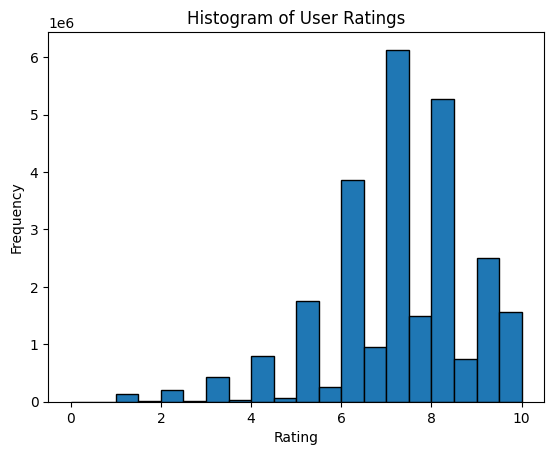

In [48]:
import pandas as pd

import matplotlib.pyplot as plt

# Read the cleaned file into a DataFrame
df_cleaned = pd.read_csv('../data/bgg_RatingItemCleaned.csv', sep=';;', engine='python')

# Convert the 'bgg_user_rating' column to numeric
df_cleaned['bgg_user_rating'] = pd.to_numeric(df_cleaned['bgg_user_rating'], errors='coerce')

# Plot the histogram
plt.hist(df_cleaned['bgg_user_rating'], bins=20, edgecolor='black')
plt.title('Histogram of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Try to detect user that troll (extreme low ratings or high ratings)

In [42]:
# Define thresholds for extreme ratings
low_threshold = 1
high_threshold = 9

# Filter users with extreme ratings
extreme_raters = df_cleaned[(df_cleaned['bgg_user_rating'] <= low_threshold) | (df_cleaned['bgg_user_rating'] >= high_threshold)]

# Group by user and count their extreme ratings
extreme_raters_count = extreme_raters.groupby('bgg_user_name').size().reset_index(name='extreme_rating_count')

# Display users with extreme ratings
print(extreme_raters_count.sort_values(by='extreme_rating_count', ascending=False))

             bgg_user_name  extreme_rating_count
408596        thebardgamer                  5030
407434          the eraser                  2477
352364        roncarlson01                  2142
126506         eriksverker                  1367
346236       richardingram                  1338
...                    ...                   ...
209706             jugueta                     1
209704               jugor                     1
209703         jugondemesa                     1
209700        jugonamateur                     1
209699  jugona_empedernida                     1

[463157 rows x 2 columns]


Show distribution of ratings

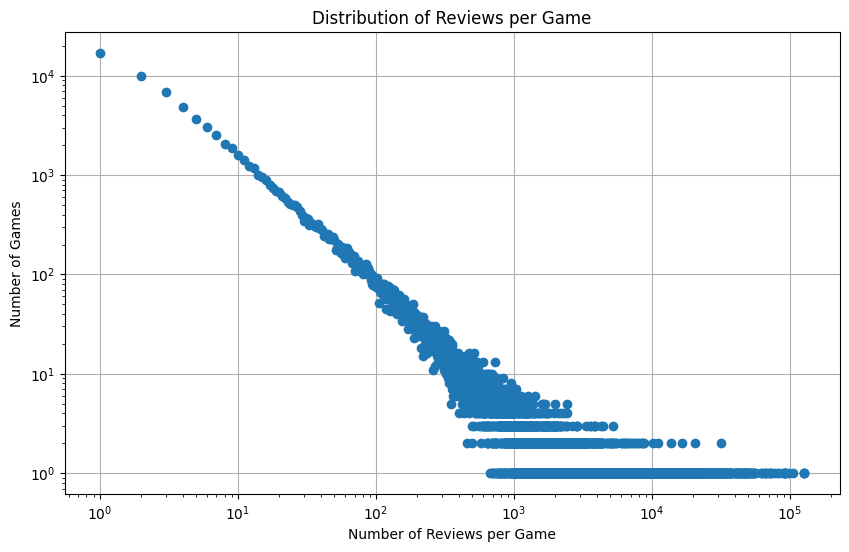

In [49]:
import matplotlib.pyplot as plt

# Count the number of reviews for each game
game_review_counts = df_cleaned['bgg_id'].value_counts()

# Count how many games have a specific number of reviews
review_distribution = game_review_counts.value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.loglog(review_distribution.index, review_distribution.values, marker='o', linestyle='None')
plt.title('Distribution of Reviews per Game')
plt.xlabel('Number of Reviews per Game')
plt.ylabel('Number of Games')
plt.grid()
plt.show()

Remove game that have less than 100 Ratings

In [ ]:
# Count the number of ratings per game
game_counts = df_cleaned['bgg_id'].value_counts()

# Select games with at least 100 ratings
games_to_keep = game_counts[game_counts >= 100].index

# Filter the DataFrame to keep only these games
df_cleaned_with_threshold = df_cleaned[df_cleaned['bgg_id'].isin(games_to_keep)]
print("Number of games:", df_cleaned_with_threshold['bgg_id'].nunique())

Number of games: 15846


Write to file

In [ ]:
df_cleaned_with_threshold.to_csv('../data/bgg_rating_threshold.csv', index=False)